# Forecasting con modelos de regresión lineal
## Carga de los datos

In [2]:
# Modulos para el tratamiento de los datos
import numpy as np
import pandas as pd

# Modulos para las visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/sales_data.csv')
df.head()

,Fecha,Ventas
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   72 non-null     object 
 1   Ventas  72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


## Preproceso de los datos

In [5]:
# Con el método datetime se convierte el atributo 'Fecha' a tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [6]:
# Verificar que la conversión fue realizda
df.dtypes

Fecha     datetime64[ns]
Ventas           float64
dtype: object

In [7]:
# Crear un atributo 'tiempo' que enumere los meses correspondientes a la fecha
df['tiempo'] = np.arange(1,73,1)

In [8]:
df.head()

,Fecha,Ventas,tiempo
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [9]:
# Crear el atributo 'mes' haciendo uso del método datetime (dt.month_name())
df['mes'] = df['Fecha'].dt.month_name(locale='es')

In [10]:
df.head(15)

,Fecha,Ventas,tiempo,mes
0,2001-01-01,139.7,1,Enero
1,2001-02-01,114.3,2,Febrero
2,2001-03-01,101.6,3,Marzo
3,2001-04-01,152.4,4,Abril
4,2001-05-01,215.9,5,Mayo
5,2001-06-01,228.6,6,Junio
6,2001-07-01,215.9,7,Julio
7,2001-08-01,190.5,8,Agosto
8,2001-09-01,177.8,9,Septiembre
9,2001-10-01,139.7,10,Octubre


### Dividir los datos en  un conjunto de entrenamiento y otro de prueba

In [11]:
# Usar los promeros 48 meses como datos de entrenamiento (4 años) y
# los demás como datos de  validación (2 años)
df_train = df.head(48)
df_test = df.loc[48:]

In [12]:
df_train.tail()

,Fecha,Ventas,tiempo,mes
43,2004-08-01,431.8,44,Agosto
44,2004-09-01,330.2,45,Septiembre
45,2004-10-01,330.2,46,Octubre
46,2004-11-01,304.8,47,Noviembre
47,2004-12-01,292.1,48,Diciembre


In [13]:
df_test.head()

,Fecha,Ventas,tiempo,mes
48,2005-01-01,266.7,49,Enero
49,2005-02-01,317.5,50,Febrero
50,2005-03-01,368.3,51,Marzo
51,2005-04-01,431.8,52,Abril
52,2005-05-01,457.2,53,Mayo


In [14]:
# Determinar los valores de X del conjunto de entrenamiento
X_train = df_train[['tiempo']].values
X_train.shape

(48, 1)

In [15]:
# Determinar el valor del eje y del conjunto de entrenamiento
y_train = df_train['Ventas'].values
y_train.shape

(48,)

In [16]:
# Realizar lo mismo con el conjunto de prueba o validación
X_test = df_test[['tiempo']].values
y_test = df_test['Ventas'].values
print(X_test, '\n\n', y_test)

[[49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]] 

 [266.7 317.5 368.3 431.8 457.2 571.5 546.1 482.6 431.8 406.4 393.7 406.4
 431.8 457.2 457.2 482.6 533.4 622.3 660.4 520.7 508.  482.6 457.2 431.8]


## Modelo de regresión lineal
El modelo de regresión lineal no trabaja con atributos de tipo fecha, para poder utilizarlo se crea con antelación la variable tiempo que enumera el los meses del atributo fecha.

In [17]:
# Importar el modulo sklearn y el modelo LinearRegression
from sklearn.linear_model import LinearRegression

In [18]:
# Crear un objeto LinearRegression y ajustarlo a los datos de entrenamiento
model_trend = LinearRegression()
model_trend.fit(X_train,y_train)

LinearRegression()

In [19]:
# Predecir las ventas en el conjunto de entrenamiento
y_train_pred = model_trend.predict(X_train)

In [20]:
# Predecir las ventas en el conjunto de test (Forecasting)
y_test_pred = model_trend.predict(X_test)

Calcular el intervalo de confianza (IC) de las predicción al 95%, asumiendo una distribución normal de los datos el valor tipificado de 'z'para este intervalo es de 1.96.

$ IC=\mu \pm ME$, siendo ME el margen de error

$ME=z*SDE$, siendo SDE la desviación estándar del error

In [21]:
# Intervalo de confianza
error = y_train - y_train_pred
sde = error.std()
ME = 1.96 * sde

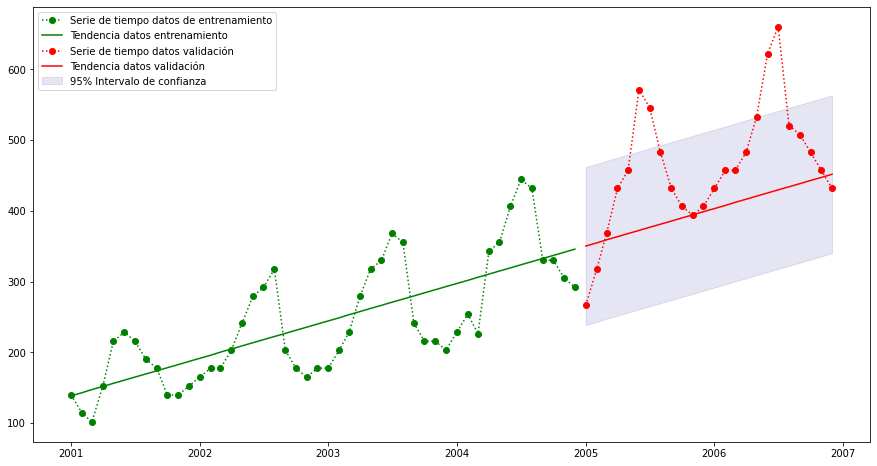

In [22]:
# Visualizar el modelo

# Tamaño de la figura
plt.figure(figsize=(15,8))

# Serie de tiempo datos entrenamiento
plt.plot(df_train['Fecha'],y_train,'go:')

# Linea de tendencia datos entrenamiento (modelo de predicción lineal)
plt.plot(df_train['Fecha'],y_train_pred,'g')

# Serie de tiempo datos de validación
plt.plot(df_test['Fecha'],y_test,'o:',color='red')

# Línea de tendencia datos de validación (modelo de predicción lienal)
plt.plot(df_test['Fecha'],y_test_pred,'b',color='red')

# Calcular límites superiores e inferiores del margen de error
superior = y_test_pred + ME
inferior = y_test_pred - ME

# Graficar el error medio en los datos de validación
plt.fill_between(df_test['Fecha'],(superior),(inferior),alpha=0.1,color='darkblue')

# Formatear el gráfico
plt.legend(['Serie de tiempo datos de entrenamiento','Tendencia datos entrenamiento','Serie de tiempo datos validación','Tendencia datos validación','95% Intervalo de confianza'])
plt.show()

In [23]:
df_test

,Fecha,Ventas,tiempo,mes
48,2005-01-01,266.7,49,Enero
49,2005-02-01,317.5,50,Febrero
50,2005-03-01,368.3,51,Marzo
51,2005-04-01,431.8,52,Abril
52,2005-05-01,457.2,53,Mayo
53,2005-06-01,571.5,54,Junio
54,2005-07-01,546.1,55,Julio
55,2005-08-01,482.6,56,Agosto
56,2005-09-01,431.8,57,Septiembre
57,2005-10-01,406.4,58,Octubre


In [24]:
# Hallar la predicción para la fecha 2006/01/01 usando el conjunto de entrenamiento
media_predicciones = model_trend.predict(np.array([[61]]))

In [25]:
print(media_predicciones)
print((media_predicciones - ME , media_predicciones + ME))

[403.28613765]
(array([291.67694148]), array([514.89533381]))


## Modelo aditivo para forecasting
Es un modelo de datos en el cual los efectos de factores individuales son diferenciados y agregados de manera conjunta para modelar los datos.

In [26]:
df_train.head()

,Fecha,Ventas,tiempo,mes
0,2001-01-01,139.7,1,Enero
1,2001-02-01,114.3,2,Febrero
2,2001-03-01,101.6,3,Marzo
3,2001-04-01,152.4,4,Abril
4,2001-05-01,215.9,5,Mayo


In [27]:
df_train['mes'][0]

'Enero'

d:\jasdata\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


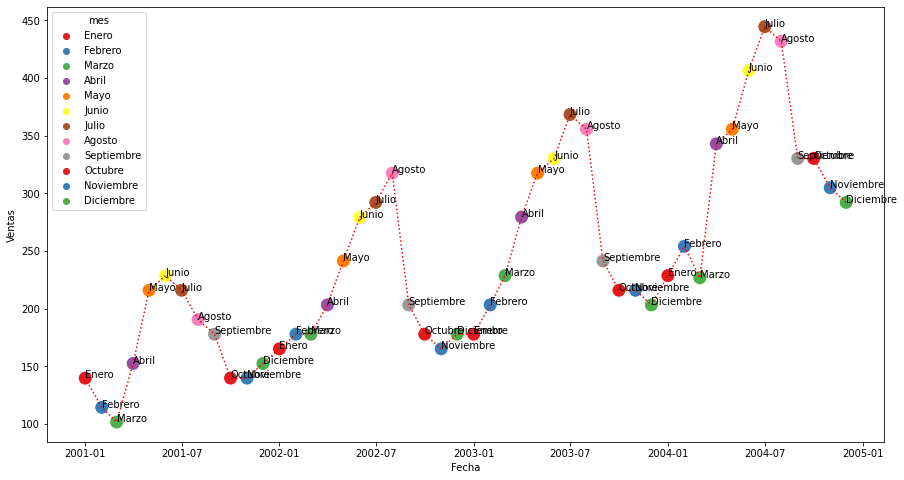

In [28]:
plt.figure(figsize=(15,8))

# Dibujar la serie de tiempo
plt.plot(df_train['Fecha'],df_train['Ventas'],'r:')

# Representar los puntos de cada mes con su respectiva vente
sns.scatterplot('Fecha','Ventas',data=df_train,s=200,hue='mes',palette='Set1')

# Mostrar sobre cada punto el mes correspondiente
for i in range(len(df_train)):
  plt.text(df_train['Fecha'][i],df_train['Ventas'][i],df_train['mes'][i])

La estacionalidad es de 12 meses, se deben crear $n-1$ variables dummy, o sea 11 variables dummy.

### Preproceso de los datos para el modelo

In [29]:
# Crear las variables dummy, se elimina la primera que se crea
dummy = pd.get_dummies(df_train['mes'],drop_first=True)

# Crear una copia de los datos de entrenamiento
df_train1 = df_train.copy()

# Concatenar la copia anterior con las variables dummy
df_train1 = pd.concat((df_train1,dummy),axis=1)

In [30]:
df_train1.head()

,Fecha,Ventas,tiempo,mes,Agosto,Diciembre,Enero,Febrero,Julio,Junio,Marzo,Mayo,Noviembre,Octubre,Septiembre
0,2001-01-01,139.7,1,Enero,0,0,1,0,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,Febrero,0,0,0,1,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,Marzo,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,Abril,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,Mayo,0,0,0,0,0,0,0,1,0,0,0


In [31]:
# Hacer lo mismo con el conjunto de validación
dummy = pd.get_dummies(df_test['mes'],drop_first=True)
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1,dummy),axis=1)

In [32]:
df_test1

,Fecha,Ventas,tiempo,mes,Agosto,Diciembre,Enero,Febrero,Julio,Junio,Marzo,Mayo,Noviembre,Octubre,Septiembre
48,2005-01-01,266.7,49,Enero,0,0,1,0,0,0,0,0,0,0,0
49,2005-02-01,317.5,50,Febrero,0,0,0,1,0,0,0,0,0,0,0
50,2005-03-01,368.3,51,Marzo,0,0,0,0,0,0,1,0,0,0,0
51,2005-04-01,431.8,52,Abril,0,0,0,0,0,0,0,0,0,0,0
52,2005-05-01,457.2,53,Mayo,0,0,0,0,0,0,0,1,0,0,0
53,2005-06-01,571.5,54,Junio,0,0,0,0,0,1,0,0,0,0,0
54,2005-07-01,546.1,55,Julio,0,0,0,0,1,0,0,0,0,0,0
55,2005-08-01,482.6,56,Agosto,1,0,0,0,0,0,0,0,0,0,0
56,2005-09-01,431.8,57,Septiembre,0,0,0,0,0,0,0,0,0,0,1
57,2005-10-01,406.4,58,Octubre,0,0,0,0,0,0,0,0,0,1,0


In [33]:
# Crear los conjuntos de entrenamiento y validación
# Crear una lista que contenga los atributos que van a hacer parte de estos conjuntos
cols = [
    'tiempo', 'Agosto', 'Diciembre', 'Febrero', 'Enero', 'Julio', 'Junio',
    'Marzo', 'Mayo', 'Noviembre', 'Octubre', 'Septiembre'
]

# Crear los diferentes conjuntos de entrenamiento y validación
X_train_ad = df_train1[cols].values
X_test_ad = df_test1[cols].values
y_train_ad = df_train1['Ventas'].values
y_test_ad = df_test1['Ventas'].values

In [34]:
# Ver la cantidad de filas y columnas de los conjuntos de datos
X_train_ad.shape, X_test_ad.shape, y_train_ad.shape, y_test_ad.shape

((48, 12), (24, 12), (48,), (24,))

### Entrenamiento y validación del método aditivo

In [35]:
# Cargar los módulos y métodos
from sklearn.linear_model import LinearRegression

In [39]:
# Crear un objeto modelo y ajustarlo a los datos
model_ad = LinearRegression()
model_ad.fit(X_train_ad,y_train_ad)

LinearRegression()

In [40]:
# Desarrollar las predicciones en el conjunto de entrenamiento
y_train_pred_ad = model_ad.predict(X_train_ad)

# Desarrollar las predicciones en el conjunto de validación
y_test_pred_ad = model_ad.predict(X_test_ad)

In [41]:
# Hacer de nuevo el cálculo del margen de error
error = y_train_ad - y_train_pred_ad
sde = error.std()
ME = 1.96 * sde

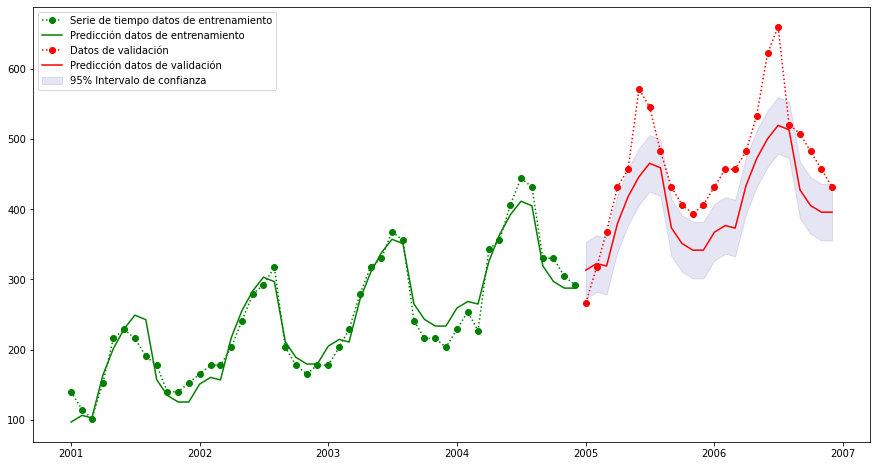

In [42]:
# Visualizar los datos
plt.figure(figsize=(15, 8))

# Serie de tiempo datos de entrenamiento
plt.plot(df_train1['Fecha'], y_train_ad, 'go:')

# Predicción datos de entrenamiento
plt.plot(df_train1['Fecha'], y_train_pred_ad, 'g')

# Datos de validación
plt.plot(df_test1['Fecha'], y_test_ad, 'o:', color='red')

# Predicción datos de validación
plt.plot(df_test1['Fecha'], y_test_pred_ad, 'r', color='red')

# margin of error
superior = y_test_pred_ad + ME
inferior = y_test_pred_ad - ME
plt.fill_between(df_test1['Fecha'], (superior), (inferior),
                 alpha=0.1,
                 color='darkblue')

plt.legend([
    'Serie de tiempo datos de entrenamiento',
    'Predicción datos de entrenamiento', 'Serie de tiempo datos de validación',
    'Predicción datos de validación', '95% Intervalo de confianza'
])
plt.show()

## Modelo multiplicativo para forecasting
Este modelo presupone que a medida que se incrementan los datos, también se incrementa el patrón estacional. La mayoría de las gráficas de series muestran este patrón. En este modelo, la tendencia y los componentes de estación se multiplican y luego se suman al componente de error.

Para construir un modelo multiplicativo se deben seguir los siguientes pasos:

1. Crear un modelo de regresión lineal en función del tiempo que indicara la tendencia $(T)$ de los datos $\hat{y}=\theta_0+\theta_{1}tiempo$.
2. A través de la predicción de la tendencia $(T)$, observe la estacionalidad $(S)$ y la irregularidad $(I)$ $(TSI)$.
3. Calcular la desviación y el efecto de la estacionalidad para cada predicción $SI=\frac{TSI}{T}$.
4. Usar el promedio de la estacionalidad para desarrollar las predicciones futuras.

In [37]:
df_train.tail()

,Fecha,Ventas,tiempo,mes
43,2004-08-01,431.8,44,Agosto
44,2004-09-01,330.2,45,Septiembre
45,2004-10-01,330.2,46,Octubre
46,2004-11-01,304.8,47,Noviembre
47,2004-12-01,292.1,48,Diciembre


In [43]:
df_test.head()

,Fecha,Ventas,tiempo,mes
48,2005-01-01,266.7,49,Enero
49,2005-02-01,317.5,50,Febrero
50,2005-03-01,368.3,51,Marzo
51,2005-04-01,431.8,52,Abril
52,2005-05-01,457.2,53,Mayo


### Paso 1: Modelo de regresión lineal: tiempo vs Ventas

In [44]:
# Crear copias de los conjuntos de entrenamiento y validación
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [45]:
# Crear el conjunto de datos de entrenamiento
X_train_m = df_train2[['tiempo']].values
y_train_m = df_train2['Ventas'].values

X_train_m.shape, y_train_m.shape

((48, 1), (48,))

In [46]:
# Crear el conjunto de datos de validación
X_test_m = df_test2[['tiempo']].values
y_test_m = df_test2['Ventas'].values

X_test_m.shape, y_test_m.shape

((24, 1), (24,))

In [47]:
# Carga el modulo correspondiente, crear y ajustar el modelo de regresión
from sklearn.linear_model import LinearRegression
model_tend_m = LinearRegression()
model_tend_m.fit(X_train_m,y_train_m)

LinearRegression()

### Paso 2: Tomar la tendencia $(T)$ y los ejemplos verdaderos $(TSI)$

In [49]:
# Realizar las predicciones con el conjunto de entrenamiento
y_train_pred_m = model_tend_m.predict(X_train_m)

In [50]:
# Agregar al dataframe la columna de las predicciones
df_train2['predicted_T'] = y_train_pred_m
df_train2.head()

,Fecha,Ventas,tiempo,mes,predicted_T
0,2001-01-01,139.7,1,Enero,138.671939
1,2001-02-01,114.3,2,Febrero,143.082175
2,2001-03-01,101.6,3,Marzo,147.492412
3,2001-04-01,152.4,4,Abril,151.902649
4,2001-05-01,215.9,5,Mayo,156.312885


### Paso 3: Calcular la desviación de los ejemplos verdaderos $(TSI)$

SI = $\frac{TSI}{ T}$

In [51]:
# Crear una columna con el valor del cálculo de las desviaciones
df_train2['SI'] = df_train2['Ventas'] / df_train2['predicted_T']
df_train2.head(20)

,Fecha,Ventas,tiempo,mes,predicted_T,SI
0,2001-01-01,139.7,1,Enero,138.671939,1.007414
1,2001-02-01,114.3,2,Febrero,143.082175,0.798842
2,2001-03-01,101.6,3,Marzo,147.492412,0.688849
3,2001-04-01,152.4,4,Abril,151.902649,1.003274
4,2001-05-01,215.9,5,Mayo,156.312885,1.381204
5,2001-06-01,228.6,6,Junio,160.723122,1.422322
6,2001-07-01,215.9,7,Julio,165.133359,1.307428
7,2001-08-01,190.5,8,Agosto,169.543595,1.123605
8,2001-09-01,177.8,9,Septiembre,173.953832,1.022110
9,2001-10-01,139.7,10,Octubre,178.364069,0.783229


### Paso 4: Promediar las desviaciones de la estacionalidad

In [52]:
# Hallar el promedio por mes de los factores de corrección
desv_est = df_train2[['mes','SI']].groupby(by='mes').mean().rename(columns={'SI':'factor de corrección'})
desv_est

,factor de corrección
mes,
Abril,1.045770
Agosto,1.289315
Diciembre,0.773112
Enero,0.841208
Febrero,0.840934
Julio,1.344616
Junio,1.309853
Marzo,0.804644
Mayo,1.218536


### Paso 5: Calcular los valores ajustados en el conjunto de entrenamiento

In [53]:
# Unir los conjuntos de datos en base al campo 'mes'
df_train2 = df_train2.merge(desv_est, on='mes')

In [54]:
df_train2.head()

,Fecha,Ventas,tiempo,mes,predicted_T,SI,factor de corrección
0,2001-01-01,139.7,1,Enero,138.671939,1.007414,0.841208
1,2002-01-01,165.1,13,Enero,191.594779,0.861715,0.841208
2,2003-01-01,177.8,25,Enero,244.517618,0.727146,0.841208
3,2004-01-01,228.6,37,Enero,297.440458,0.768557,0.841208
4,2001-02-01,114.3,2,Febrero,143.082175,0.798842,0.840934


In [55]:
# Crear una columna con los valores ajustados
df_train2['Val_ajustados'] = df_train2['predicted_T'] * df_train2['factor de corrección']

In [56]:
df_train2.head()

,Fecha,Ventas,tiempo,mes,predicted_T,SI,factor de corrección,Val_ajustados
0,2001-01-01,139.7,1,Enero,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,13,Enero,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,25,Enero,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,37,Enero,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,2,Febrero,143.082175,0.798842,0.840934,120.322726


**Predicciones (Forecasting)**

In [58]:
# Realizar las predicciones en el conjunto de validación y crear una columna nueva
pred_test = model_tend_m.predict(X_test_m)
df_test2['Tendencia datos test']= pred_test 
df_test2.head()

,Fecha,Ventas,tiempo,mes,Tendencia datos test
48,2005-01-01,266.7,49,Enero,350.363298
49,2005-02-01,317.5,50,Febrero,354.773535
50,2005-03-01,368.3,51,Marzo,359.183771
51,2005-04-01,431.8,52,Abril,363.594008
52,2005-05-01,457.2,53,Mayo,368.004244


In [59]:
# Combinar con el dataframes en base al campo 'mes'
df_test2 = pd.merge(df_test2,desv_est,on='mes')
df_test2.head()

,Fecha,Ventas,tiempo,mes,Tendencia datos test,factor de corrección
0,2005-01-01,266.7,49,Enero,350.363298,0.841208
1,2006-01-01,431.8,61,Enero,403.286138,0.841208
2,2005-02-01,317.5,50,Febrero,354.773535,0.840934
3,2006-02-01,457.2,62,Febrero,407.696374,0.840934
4,2005-03-01,368.3,51,Marzo,359.183771,0.804644


In [60]:
# Crear una nueva columna con la multiplicación de los campos de tendencia y factor de corrección
df_test2['Pred mult'] = df_test2['Tendencia datos test'] * df_test2['factor de corrección']
df_test2.head()

,Fecha,Ventas,tiempo,mes,Tendencia datos test,factor de corrección,Pred mult
0,2005-01-01,266.7,49,Enero,350.363298,0.841208,294.728346
1,2006-01-01,431.8,61,Enero,403.286138,0.841208,339.247452
2,2005-02-01,317.5,50,Febrero,354.773535,0.840934,298.341276
3,2006-02-01,457.2,62,Febrero,407.696374,0.840934,342.845914
4,2005-03-01,368.3,51,Marzo,359.183771,0.804644,289.015154


In [71]:
# Calcular el margen de error para usarlo en la gráfica
error = df_train2['Ventas'] - df_train2['Val_ajustados']
SE = error.std()
ME = 1.96*SE
print(ME)

36.42544715050407


In [72]:
# Ordenar por fecha los datos de entrenamiento y validación
df_train2.sort_values(by='Fecha',inplace=True)
df_test2.sort_values(by='Fecha',inplace=True)

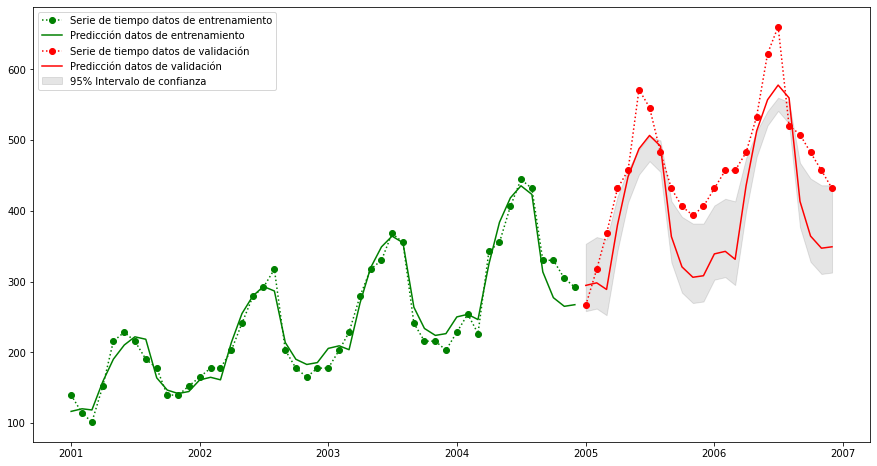

In [73]:
# Visualizar los datos
plt.figure(figsize=(15, 8))

# Serie de tiempo datos de entrenamiento
plt.plot(df_train2['Fecha'], df_train2['Ventas'], 'go:')

# Predicción datos de entrenamiento
plt.plot(df_train2['Fecha'], df_train2['Val_ajustados'], 'g')

# Serie de tiempo datos de validación
plt.plot(df_test2['Fecha'], df_test2['Ventas'], 'o:', color='red')

# Predicción datos de validación
plt.plot(df_test2['Fecha'], df_test2['Pred mult'], 'b', color='red')

# 95% Intervalo de confianza
superio = df_test2['Pred mult'] + ME
inferior = df_test2['Pred mult'] - ME
plt.fill_between(df_test1['Fecha'],(superior),(inferior),alpha=0.3,color='black')

plt.legend([
    'Serie de tiempo datos de entrenamiento',
    'Predicción datos de entrenamiento', 'Serie de tiempo datos de validación',
    'Predicción datos de validación', '95% Intervalo de confianza'
])
plt.show()


magnitud del patron estacional, aumental al aumentar los valores de los datos, entocnes el mejor seria el multiplicativo.

aditivo, cuando no hay esa dependencia.

## ¿Qué modelo elegir?
Elija el modelo multiplicativo cuando la magnitud del patrón estacional en los datos depende de la magnitud de los datos. En otras palabras, la magnitud del patrón estacional aumenta a medida que los valores de los datos se incrementan y disminuye a medida que los valores de los datos decrecen.

Elija el modelo aditivo cuando la magnitud del patrón estacional en los datos no dependa de la magnitud de los datos. En otras palabras, la magnitud del patrón de estación no cambia cuando la serie sube o baja.

Si el patrón de los datos no es muy obvio y usted tiene dificultad para elegir entre los procedimientos aditivo y multiplicativo, pruebe y elija el que ofrezca las mediciones de exactitud más pequeñas.